# 一个使用ggplot2以及其他r包的范本

[R语言ggplot2作图配色相关R包备选 - 牧羊的男孩儿的文章 - 知乎](https://zhuanlan.zhihu.com/p/473812161)

In [66]:
library("ggsci")
library("ggplot2")
library("ggprism")
library("patchwork")
p1 <- ggplot(mtcars) + geom_point(aes(mpg, disp)) + scale_color_npg() + scale_fill_npg() + theme_prism()
p2 <- ggplot(mtcars) + geom_boxplot(aes(gear, disp, group = gear)) + scale_color_npg() + scale_fill_npg() + theme_prism()
p1 + p2

ERROR while rich displaying an object: Error in `plot_theme()`:
! The `legend.text.align` theme element is not defined in the element
  hierarchy.

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7

In [2]:
p3 <- ggplot(mtcars) + geom_smooth(aes(disp, qsec)) +  scale_color_npg() + scale_fill_npg() + theme_prism()

p4 <- ggplot(mtcars) + geom_bar(aes(carb)) + scale_color_npg() + scale_fill_npg() + theme_prism()
(p1 | p2 )/ (p3 | p4)
# p1

ERROR while rich displaying an object: Error in `plot_theme()`:
! The `legend.text.align` theme element is not defined in the element
  hierarchy.

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7

In [67]:
data("diamonds")#使用diamonds数据集
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [71]:
p1 <- ggplot(
  subset(diamonds, carat >= 2.2), #筛选数据
  aes(x = table, y = price, colour = cut) #确定xy
) +
  geom_point(alpha = 0.7) + #画点
  geom_smooth(method = "loess", alpha = 0.05, linewidth = 1, span = 1) +  #画平滑曲线
  scale_color_npg() +
  scale_fill_npg() +
  # theme_prism()

p2 <- ggplot(
  subset(diamonds, carat > 2.2 & depth > 55 & depth < 70), #筛选数据
  aes(x = depth, fill = cut) #确定x
) +
  geom_histogram(colour = "black", binwidth = 1, position = "dodge") + #画直方图
  scale_color_aaas() +
  scale_fill_aaas() +
  # theme_prism() #主题
p2 / p1

ERROR: Error in ggplot(subset(diamonds, carat >= 2.2), aes(x = table, y = price, : could not find function "+<-"


In [5]:
# install.packages("ggpubr")
library(ggpubr)

In [6]:
ggarrange(p1,p2,labels = c("A", "B"),ncol = 2, nrow = 1,common.legend = TRUE, legend = "bottom")

`geom_smooth()` using formula = 'y ~ x'


ERROR: [1m[33mError[39m in `plot_theme()`:[22m
[1m[22m[33m![39m The `legend.text.align` theme element is not defined in the element
  hierarchy.


`geom_smooth()` using formula = 'y ~ x'


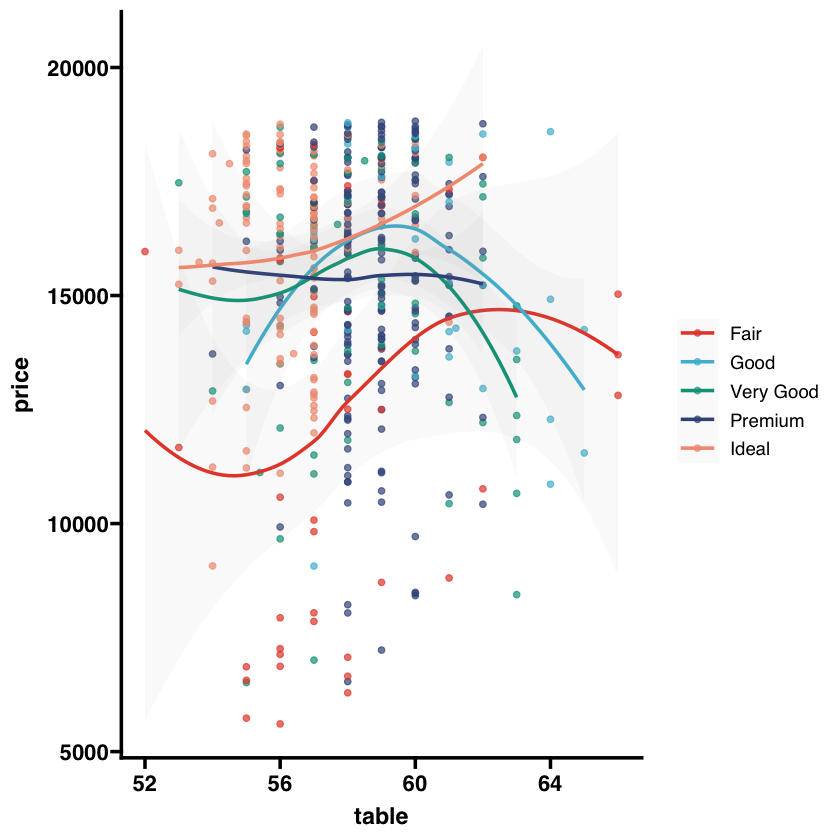

In [ ]:
p1

[1] "#E64B35B2" "#4DBBD5B2" "#00A087B2" "#3C5488B2" "#F39B7FB2" "#8491B4B2"
[7] "#91D1C2B2" "#DC0000B2" "#7E6148B2"

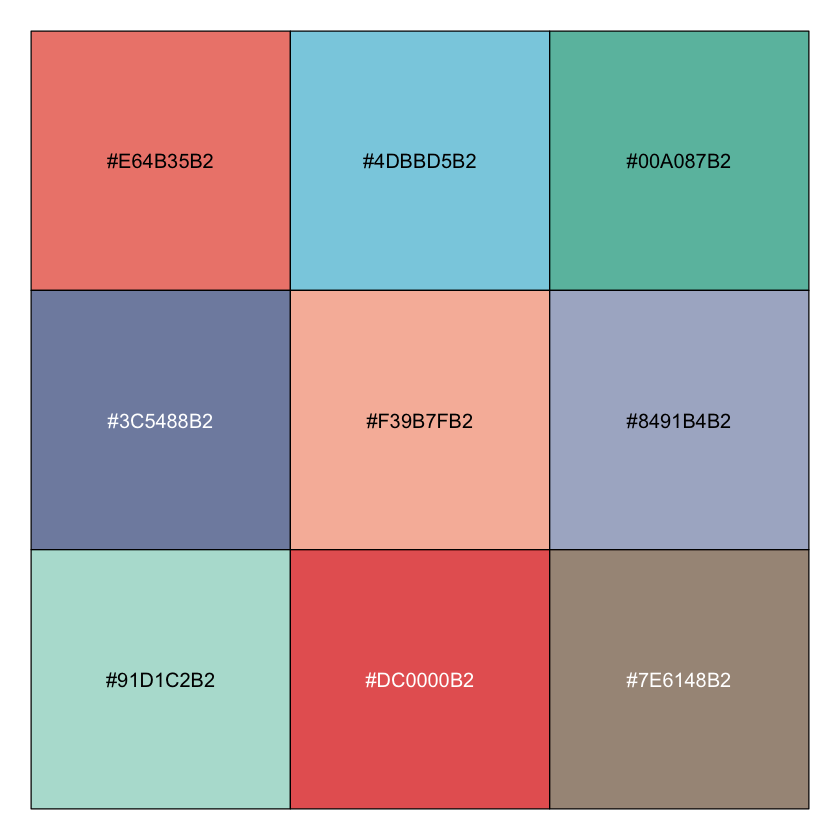

In [ ]:
library("scales")
mypal <- pal_npg("nrc", alpha = 0.7)(9)
mypal
show_col(mypal)

# ggpubr
- [不要一直用ggplot2啦，尝试用ggpubr画图吧！ - 梨酱的文章 - 知乎](https://zhuanlan.zhihu.com/p/102653888)
- [R绘图(6): 拯救初学者——发表级绘图全能包ggpubr - TOP生物信息的文章 - 知乎](https://zhuanlan.zhihu.com/p/376438657)

In [3]:
library("ggpubr")
ppo_v4_reload_count <- read.csv("ppo_v4_reload_count.csv")
ppo_v4_reload_count_huge_car <- read.csv("ppo_v4_reload_count_huge_car.csv")

Loading required package: ggplot2



In [79]:
p1 = ggscatter(data = ppo_v4_reload_count,
    x = "episode",
    y = "mean.detail",
    color = "algorithm",
    add = "loess", conf.int = TRUE,
    size = 1,
    pallete = "npg",
    # palette = c("#00AFBB", "#E7B800", "#FC4E07"),
    theme = theme_pubr()
) +stat_cor(aes(color = "algorithm"), show.legend = FALSE, label.x = 40)


In [80]:
p2 = ggscatter(data = ppo_v4_reload_count_huge_car,
    x = "episode",
    y = "mean.detail",
    color = "algorithm",
    pallete = "npg",
    # palette = c("#00AFBB", "#E7B800", "#FC4E07"),
    add = "loess", conf.int = TRUE,
    size = 1,
    theme = theme_pubr(),
    ylab = "Distance"
) + stat_cor(aes(color = "algorithm"), show.legend = FALSE, label.x = 40)


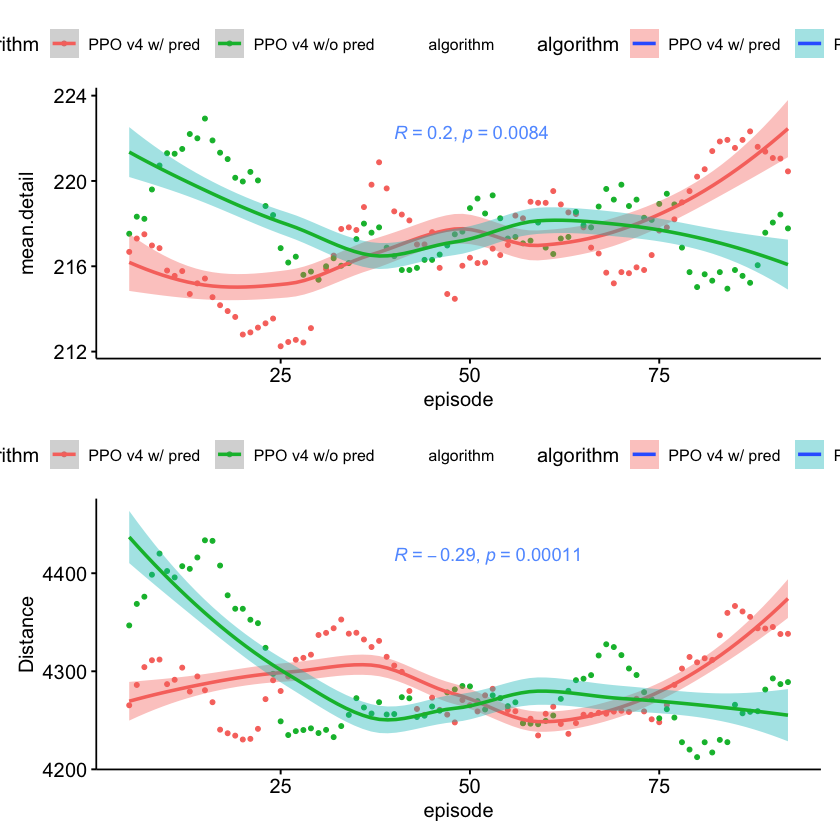

In [81]:

library("patchwork")
p1/p2

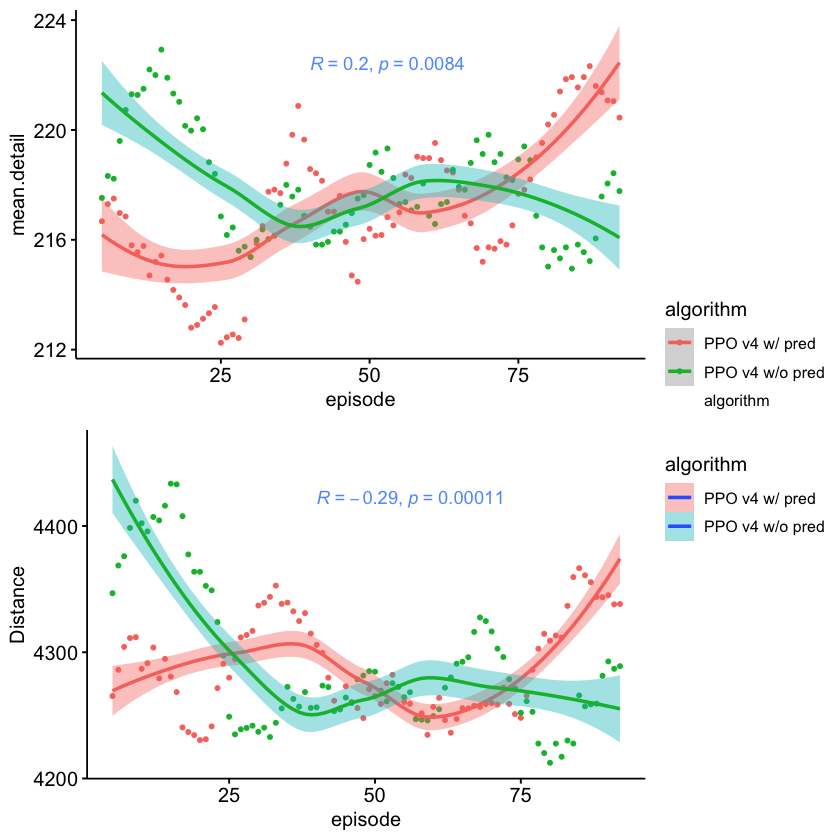

In [84]:
# ggpubr里有ggarrange()可以用
ggarrange(p1,p2,nrow = 2, common.legend = T,legend = "right")

In [85]:
ppo_v4_reward = read.csv("ppo_v4_reward.csv")
ppo_v4_reward

X,episode,mean.reward,std.reward,algorithm,upper,lower
<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
5,5,-98377.23862,786.9968,ppo v4 w/ pred,NA,NA
6,6,-97873.48862,643.1938,ppo v4 w/ pred,NA,NA
7,7,-97750.93238,0.0000,ppo v4 w/ pred,NA,NA
8,8,-97656.85738,1652.2240,ppo v4 w/ pred,NA,NA
9,9,-96977.03238,3386.2724,ppo v4 w/ pred,NA,NA
10,10,-94856.88307,9387.7154,ppo v4 w/ pred,-75231.338,-89745.68
11,11,-81393.19862,2557.0757,ppo v4 w/ pred,-42609.145,-102687.17
12,12,-67593.47475,2805.0001,ppo v4 w/ pred,-6971.119,-111071.70
13,13,-53214.12547,13832.1181,ppo v4 w/ pred,32554.700,-115581.22


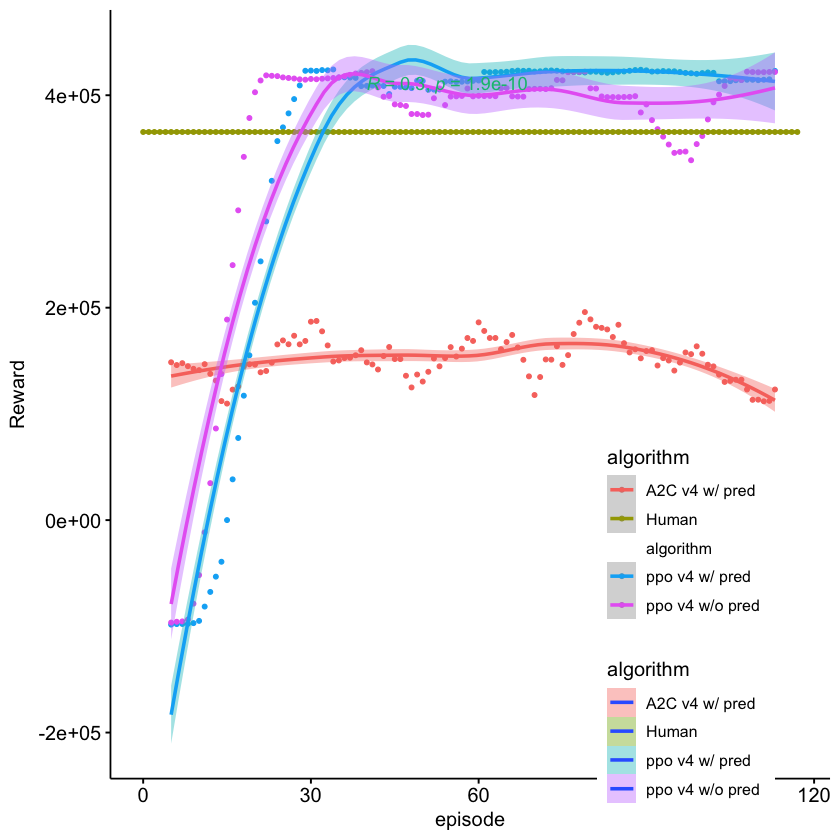

In [99]:
p3 = ggscatter(data = ppo_v4_reward,
    x = "episode",
    y = "mean.reward",
    color = "algorithm",
    pallete = "npg",
    # palette = c("#00AFBB", "#E7B800", "#FC4E07"),
    add = "loess", conf.int = TRUE,
    size = 1,
    theme = theme_pubr(),
    ylab = "Reward",
    legend = c(0.8,0.2),
) + stat_cor(aes(color = "algorithm"), show.legend = FALSE, label.x = 40)
p3

,wt,mpg,cyl
,<dbl>,<dbl>,<fct>
Mazda RX4,2.620,21.0,6
Mazda RX4 Wag,2.875,21.0,6
Datsun 710,2.320,22.8,4


Warning message:
"Vectorized input to `element_text()` is not officially supported.
i Results may be unexpected or may change in future versions of ggplot2."


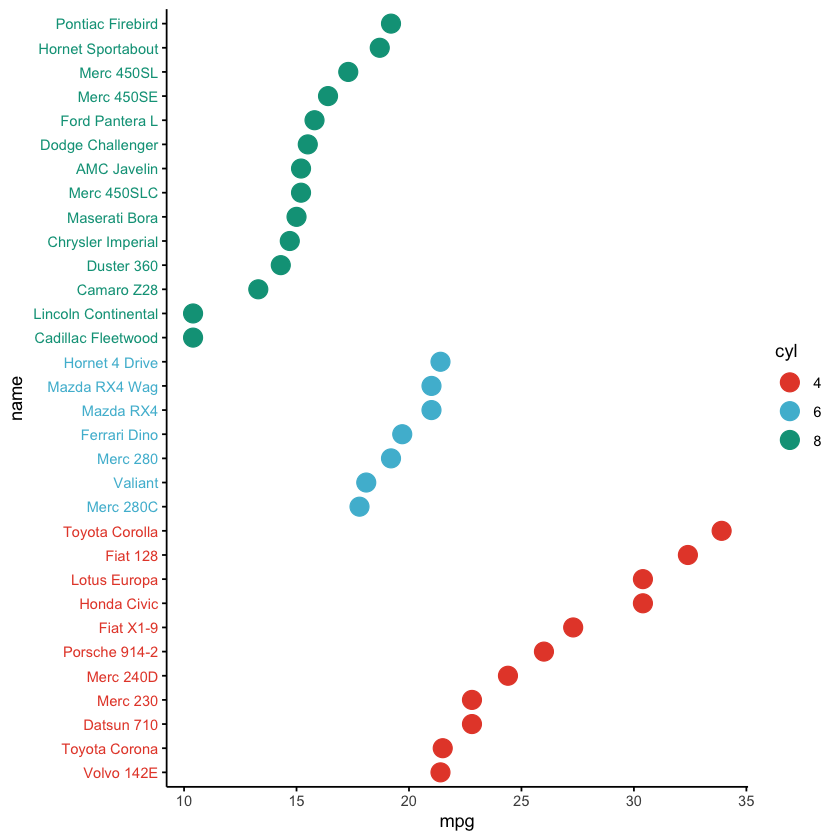

In [98]:
# install.packages("ggplot2")
# install.packages("ggpubr")

library("ggpubr")


# Load data
data("mtcars")
df <- mtcars
df$cyl <- as.factor(df$cyl)
df$name <- rownames(df)
head(df[, c("wt", "mpg", "cyl")], 3)

# Change colors by  group cyl
ggdotchart(df, x = "name", y = "mpg",
   group = "cyl", color = "cyl", size=5, alpha=0.1,
   palette = "npg", # c('#999999','#E69F00','#56B4E9'),palette = c("#00AFBB", "#E7B800", "#FC4E07"),
   rotate = TRUE,
   sorting = "descending",
   ggtheme = theme_classic(),
   y.text.col = TRUE )

Warning message:
"The following aesthetics were dropped during statistical transformation: colour
and fill.
i This can happen when ggplot fails to infer the correct grouping structure in
  the data.
i Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"
Warning message:
"The following aesthetics were dropped during statistical transformation:
colour.
i This can happen when ggplot fails to infer the correct grouping structure in
  the data.
i Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"


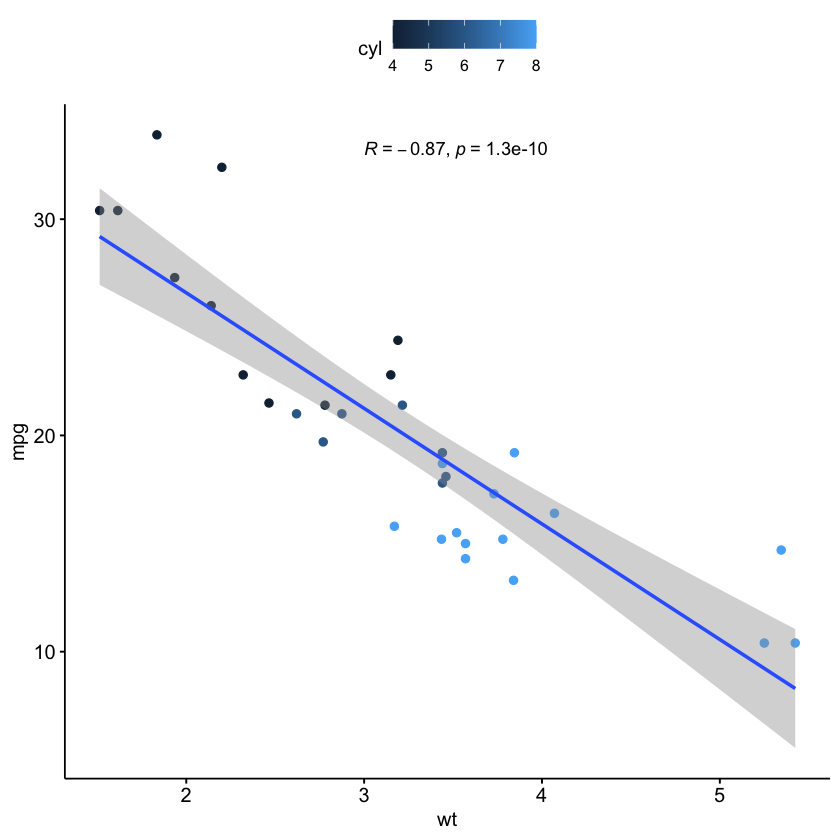

In [48]:
ggscatter(mtcars, x = "wt", y = "mpg", color = "cyl", add = "reg.line", conf.int = TRUE)+
stat_cor(aes(color = cyl), label.x = 3)

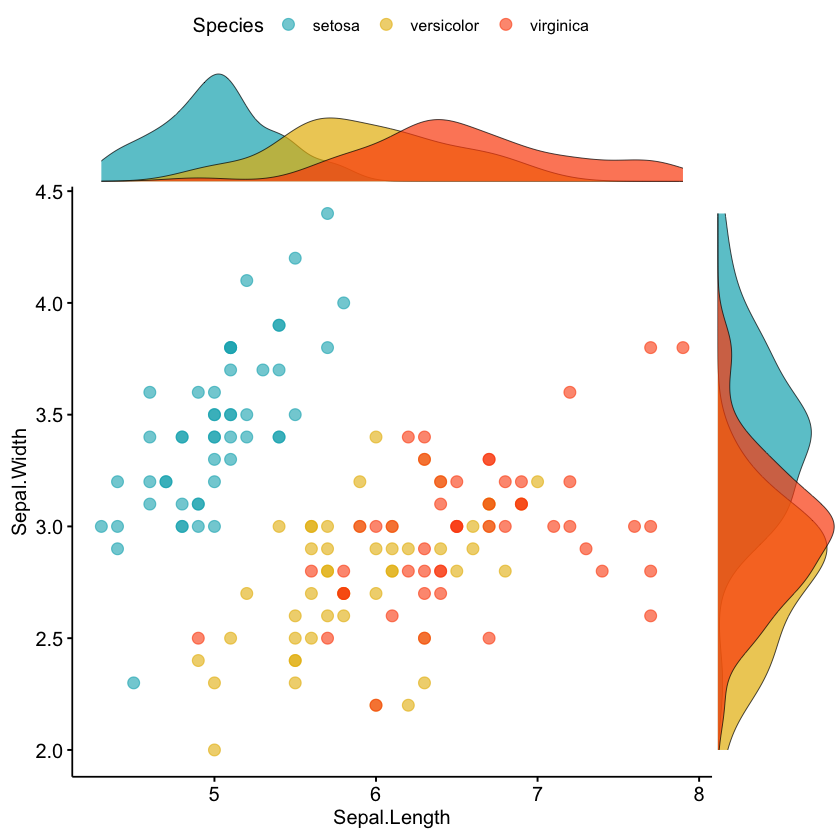

In [ ]:
ggscatterhist(
  iris, x = "Sepal.Length", y = "Sepal.Width",
  color = "Species", size = 3, alpha = 0.6,
  palette = c("#00AFBB", "#E7B800", "#FC4E07"),
  margin.params = list(fill = "Species", color = "black", size = 0.2)
)

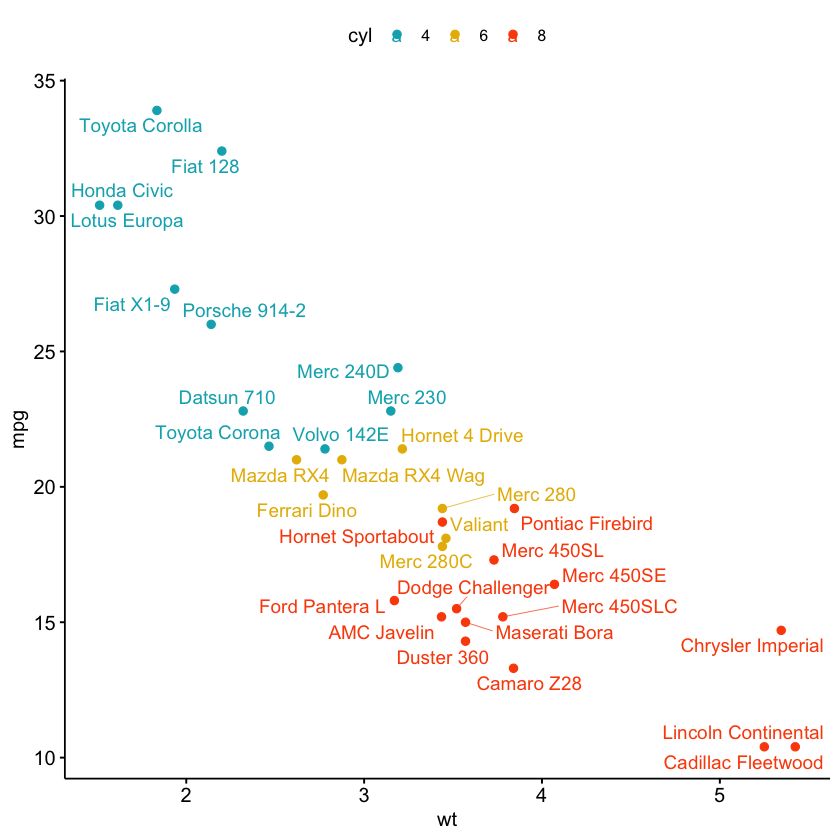

In [9]:
df <- mtcars
df$cyl <- as.factor(df$cyl)
#head(df[, c("wt", "mpg", "cyl")], 3)
#>                  wt  mpg cyl
#> Mazda RX4     2.620 21.0   6
#> Mazda RX4 Wag 2.875 21.0   6
#> Datsun 710    2.320 22.8   4

# Textual annotation
# +++++++++++++++++
df$name <- rownames(df)
ggscatter(df, x = "wt", y = "mpg",
   color = "cyl", palette = c("#00AFBB", "#E7B800", "#FC4E07"),
   label = "name", repel = TRUE)

In [10]:
ggpie(df, "value", label = labs, fill="group", 
      palette = c("#00AFBB", "#E7B800", "#FC4E07"),
      color='white')

ERROR: [1m[33mError[39m in `dplyr::pull()`:[22m
[33m![39m Can't extract columns that don't exist.
[31mx[39m Column `value` doesn't exist.


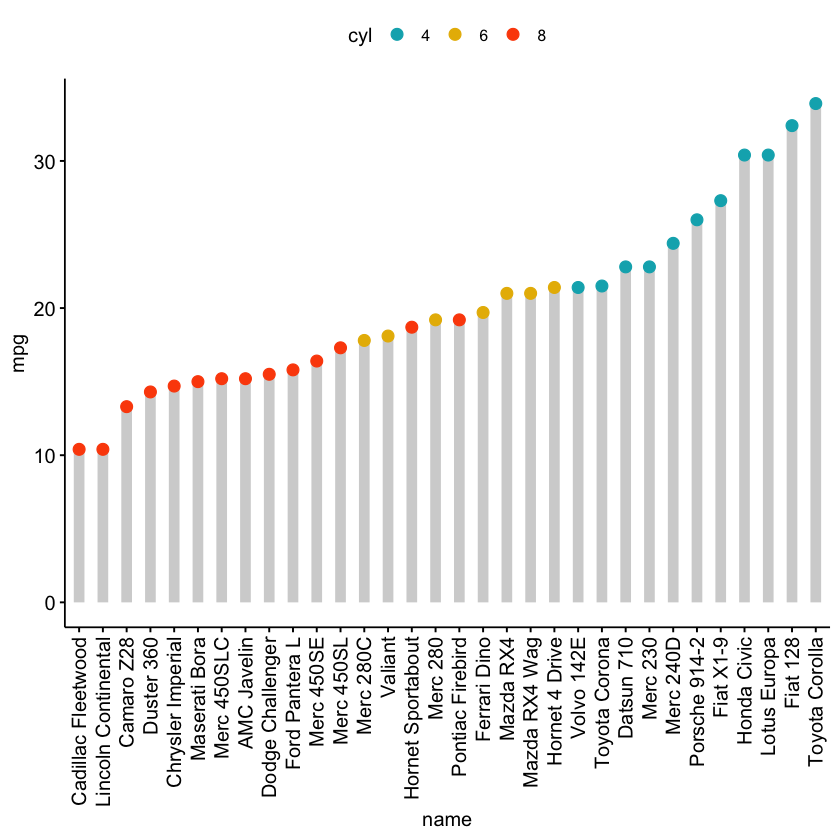

In [35]:
# Load data
data("mtcars")
dfm <- mtcars
# Convert the cyl variable to a factor
dfm$cyl <- as.factor(dfm$cyl)
# Add the name colums
dfm$name <- rownames(dfm)
# Inspect the data
#head(dfm[, c("name", "wt", "mpg", "cyl")])
#>                                name    wt  mpg cyl
#> Mazda RX4                 Mazda RX4 2.620 21.0   6
#> Mazda RX4 Wag         Mazda RX4 Wag 2.875 21.0   6
#> Datsun 710               Datsun 710 2.320 22.8   4
#> Hornet 4 Drive       Hornet 4 Drive 3.215 21.4   6
#> Hornet Sportabout Hornet Sportabout 3.440 18.7   8
#> Valiant                     Valiant 3.460 18.1   6

ggdotchart(dfm, x = "name", y = "mpg",
           color = "cyl",                                # Color by groups
           size = 3,
           palette = c("#00AFBB", "#E7B800", "#FC4E07"), # Custom color palette
           sorting = "ascending",                        # Sort value in descending order
           add = "segments",                             # Add segments from y = 0 to dots
           ggtheme = theme_pubr()                        # ggplot2 theme
           )

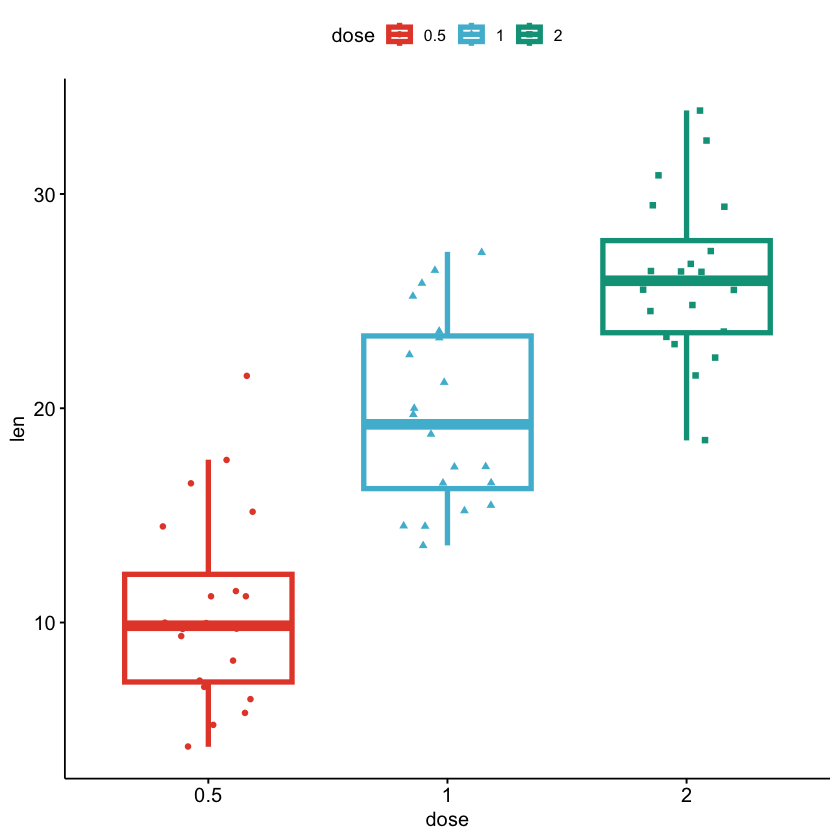

In [41]:
# Load data
data("ToothGrowth")
df <- ToothGrowth
#head(df, 4)
#>    len supp dose
#> 1  4.2   VC  0.5
#> 2 11.5   VC  0.5
#> 3  7.3   VC  0.5
#> 4  5.8   VC  0.5

# Box plots with jittered points
# :::::::::::::::::::::::::::::::::::::::::::::::::::
# Change outline colors by groups: dose
# Use custom color palette
# Add jitter points and change the shape by groups
p <- ggboxplot(df, x = "dose", y = "len", add = "jitter",
                color = "dose", shape = "dose",size=1.5, palette = "npg") 
                # palette =c("#00AFBB", "#E7B800", "#FC4E07"))
p

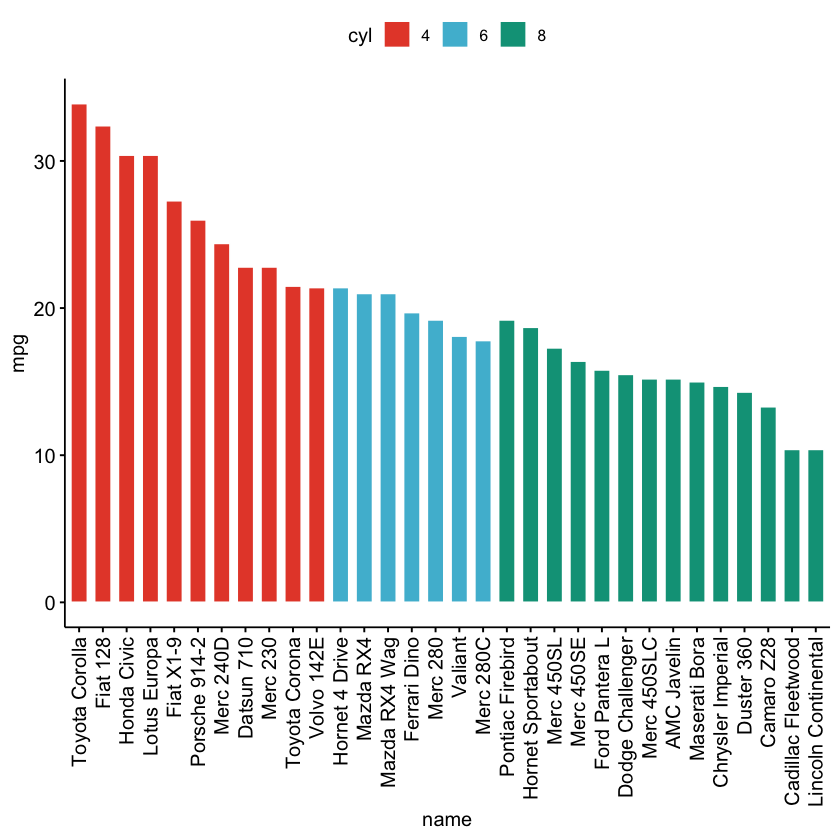

In [29]:
# Load data
data("mtcars")
dfm <- mtcars
# Convert the cyl variable to a factor
dfm$cyl <- as.factor(dfm$cyl)
# Add the name colums
dfm$name <- rownames(dfm)
# Inspect the data
#head(dfm[, c("name", "wt", "mpg", "cyl")])
#>                                name    wt  mpg cyl
#> Mazda RX4                 Mazda RX4 2.620 21.0   6
#> Mazda RX4 Wag         Mazda RX4 Wag 2.875 21.0   6
#> Datsun 710               Datsun 710 2.320 22.8   4
#> Hornet 4 Drive       Hornet 4 Drive 3.215 21.4   6
#> Hornet Sportabout Hornet Sportabout 3.440 18.7   8
#> Valiant                     Valiant 3.460 18.1   6

ggbarplot(dfm, x = "name", y = "mpg",
        fill = "cyl",               # change fill color by cyl
        color = "white",            # Set bar border colors to white
        palette = "npg",            # jco journal color palett. see ?ggpar, e.g.: "npg", "aaas", "lancet", "jco", "ucscgb", "uchicago", "simpsons" and "rickandmorty"
        sort.val = "desc",          # Sort the value in dscending order
        sort.by.groups = TRUE,      # Sort inside each group
        x.text.angle = 90           # Rotate vertically x axis texts
        )

In [22]:
?ggpar

ggpar                  package:ggpubr                  R Documentation

_G_r_a_p_h_i_c_a_l _p_a_r_a_m_e_t_e_r_s

_D_e_s_c_r_i_p_t_i_o_n:

     Graphical parameters

_U_s_a_g_e:

     ggpar(
       p,
       palette = NULL,
       gradient.cols = NULL,
       main = NULL,
       submain = NULL,
       caption = NULL,
       xlab = NULL,
       ylab = NULL,
       title = NULL,
       subtitle = NULL,
       font.main = NULL,
       font.submain = NULL,
       font.x = NULL,
       font.y = NULL,
       font.caption = NULL,
       font.title = NULL,
       font.subtitle = NULL,
       font.family = "",
       xlim = NULL,
       ylim = NULL,
       xscale = c("none", "log2", "log10", "sqrt"),
       yscale = c("none", "log2", "log10", "sqrt"),
       format.scale = FALSE,
       legend = NULL,
       legend.title = NULL,
       font.legend = NULL,
       ticks = TRUE,
       tickslab = TRUE,
       font.tickslab = NULL,
       font.xtickslab = font.tick

# ggstatsplot
- [ggstatsplot！常见SCI统计图表一键搞定~~](https://mp.weixin.qq.com/s/MF0FiX5Towu-YiY1bWyErQ)

In [ ]:
# install.packages("ggpubr")
library(ggpubr)

In [32]:
library(ggstatsplot)

You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167



Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"


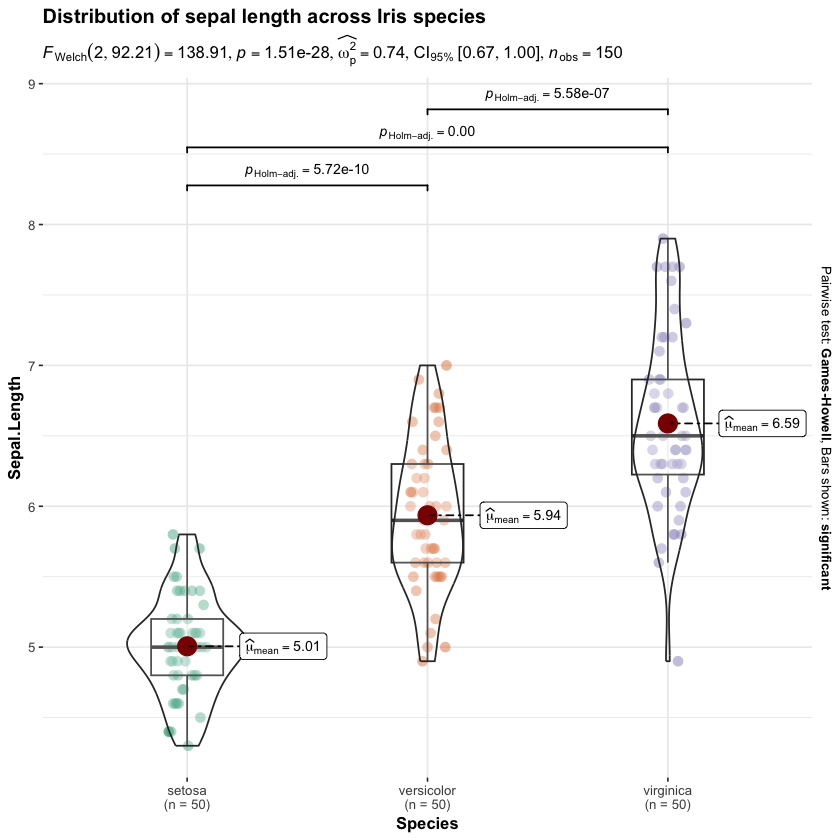

In [43]:
set.seed(123)

ggbetweenstats(
  data  = iris,
  x     = Species,
  y     = Sepal.Length,
  title = "Distribution of sepal length across Iris species",
)

Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"


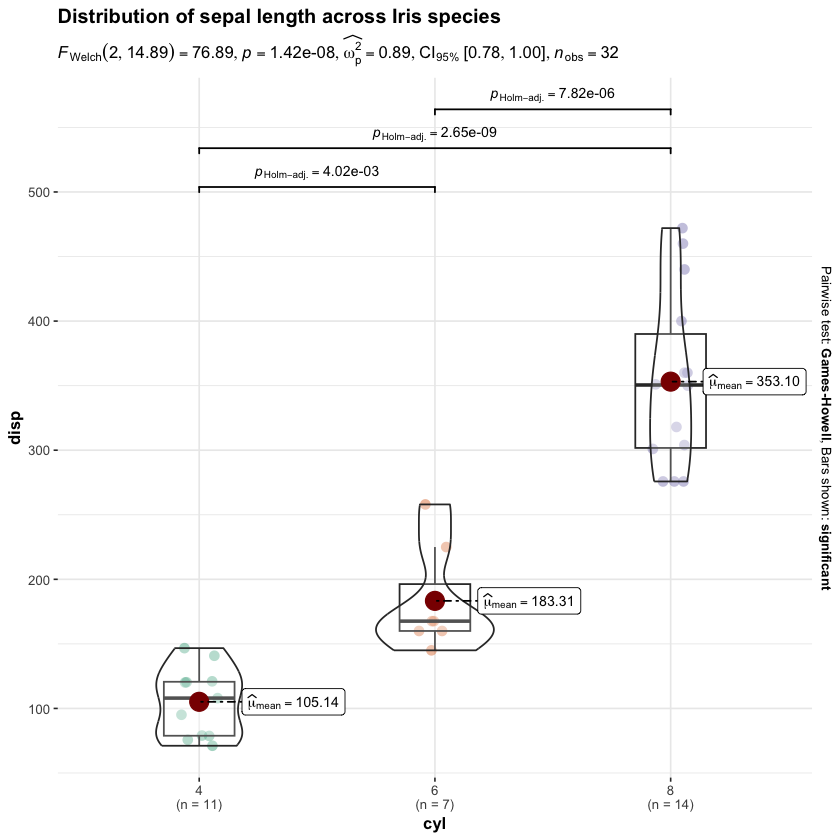

In [51]:
ggbetweenstats(
  data  = mtcars,
  x     = cyl,
  y     = disp,
  title = "Distribution of sepal length across Iris species", 
  color_palette = "npg"
)

Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"
Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"


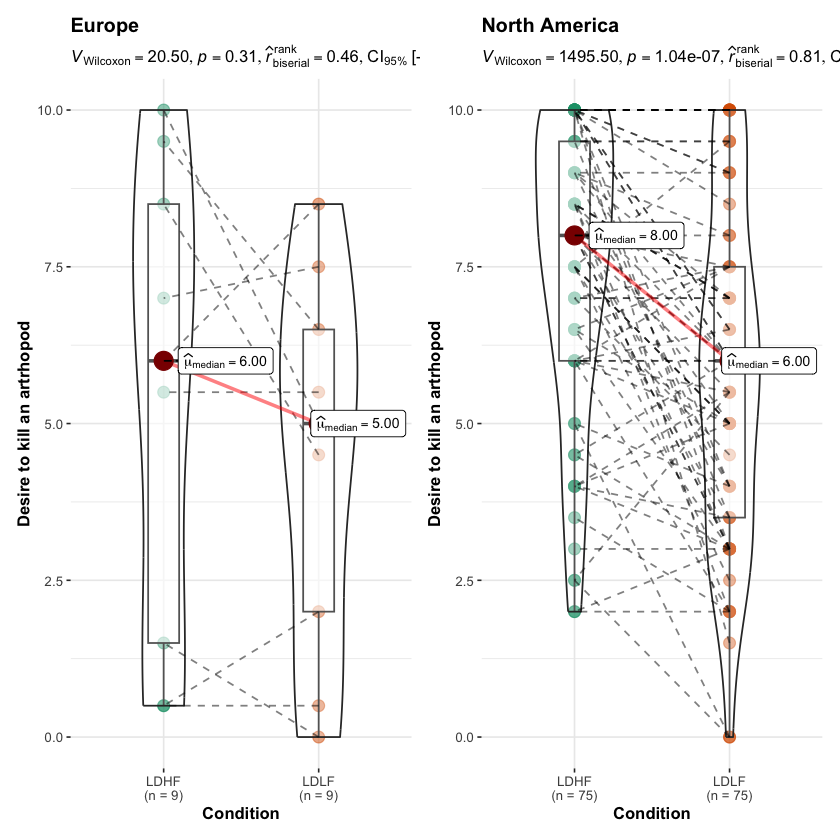

In [48]:
set.seed(123)

grouped_ggwithinstats(
  data            = dplyr::filter(bugs_long, region %in% c("Europe", "North America"), condition %in% c("LDLF", "LDHF")),
  x               = condition,
  y               = desire,
  type            = "np",
  xlab            = "Condition",
  ylab            = "Desire to kill an artrhopod",
  grouping.var    = region,
  # color_palette = "npg",
)

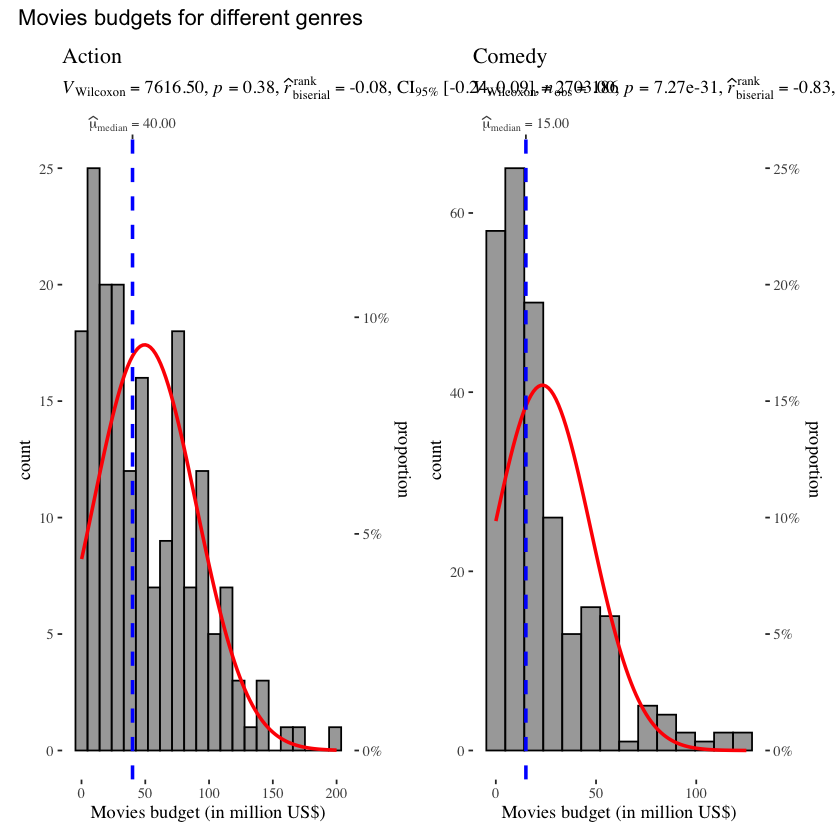

In [ ]:
set.seed(123)

grouped_gghistostats(
  data              = dplyr::filter(movies_long, genre %in% c("Action", "Comedy")),
  x                 = budget,
  test.value        = 50,
  type              = "nonparametric",
  xlab              = "Movies budget (in million US$)",
  grouping.var      = genre,
  normal.curve      = TRUE,
  normal.curve.args = list(color = "red", size = 1),
  ggtheme           = ggthemes::theme_tufte(),
  ## modify the defaults from `{ggstatsplot}` for each plot
  plotgrid.args     = list(nrow = 1),
  annotation.args   = list(title = "Movies budgets for different genres")
)

In [ ]:
ggscatterstats(
  data  = ggplot2::msleep,
  x     = sleep_rem,
  y     = awake,
  xlab  = "REM sleep (in hours)",
  ylab  = "Amount of time spent awake (in hours)",
  title = "Understanding mammalian sleep"
)

ERROR while rich displaying an object: Error:
! Problem while computing aesthetics.
i Error occurred in the 3rd layer.
Caused by error in `scales_add_defaults()`:
! could not find function "scales_add_defaults"

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr

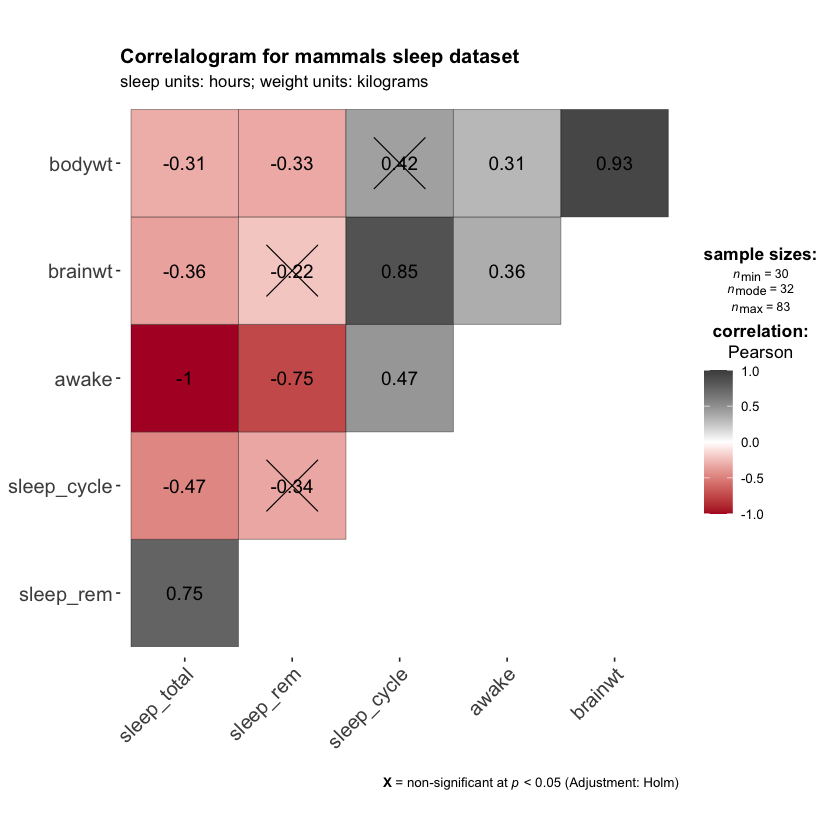

In [ ]:
set.seed(123)

## as a default this function outputs a correlation matrix plot
ggcorrmat(
  data     = ggplot2::msleep,
  colors   = c("#B2182B", "white", "#4D4D4D"),
  title    = "Correlalogram for mammals sleep dataset",
  subtitle = "sleep units: hours; weight units: kilograms"
)

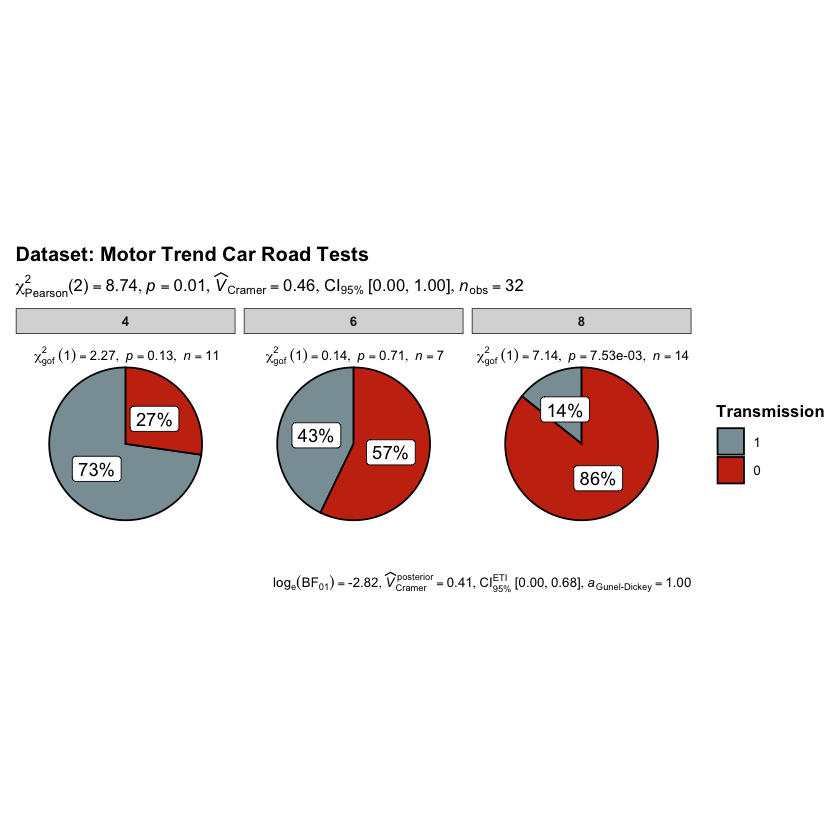

In [ ]:
set.seed(123)

ggpiestats(
  data         = mtcars,
  x            = am,
  y            = cyl,
  package      = "wesanderson",
  palette      = "Royal1",
  title        = "Dataset: Motor Trend Car Road Tests",
  legend.title = "Transmission"
)

In [ ]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [ ]:
library("ggridges")
p <- ggplot(data = mtcars,
            aes(x = mpg, y = hp, fill = cyl, group=cyl)) +
            geom_density_ridges() +
            theme_classic()
p

Picking joint bandwidth of 1.38

Warning message:
"The following aesthetics were dropped during statistical transformation: y
i This can happen when ggplot fails to infer the correct grouping structure in
  the data.
i Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"
ERROR while rich displaying an object: Error in `geom_density_ridges()`:
! Problem while setting up geom.
i Error occurred in the 1st layer.
Caused by error in `compute_geom_1()`:
! `geom_density_ridges()` requires the following missing aesthetics: y

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names,

In [ ]:
library(ggplot2)
library(ggalluvial)
df = mtcars

In [ ]:
ggplot(df, aes(x = x, fill=cyl, label=cyl,
                stratum = stratum, alluvium  = disp))+#数据
        geom_flow(width = 0.3,#连线宽度
                curve_type = "sine",#曲线形状，有linear、cubic、quintic、sine、arctangent、sigmoid几种类型可供调整
                alpha = 0.5,#透明度
                color = 'white',#间隔颜色
                size = 0.1)+#间隔宽度
        geom_stratum(width = 0.28)+#图中方块的宽度
        geom_text(stat = 'stratum', size = 2, color = 'black')+
        scale_fill_manual(values = col)+#自定义颜色
        theme_void()+#主题（无轴及网格线）
        theme(legend.position = 'none')#去除图例

ERROR while rich displaying an object: Error in `geom_flow()`:
! Problem while computing aesthetics.
i Error occurred in the 1st layer.
Caused by error:
! object 'x' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. r